# <font color = 'purple'><center>Prise en main d'un réseau de neurone</center>

La bibliothèque Keras permet de définir et entrainer les algorithmes de réseaux de neurones profonds et d'apprentissage automatique, notamment :
- Tensorflow
- Theano
- Microsoft Cognitive Toolkit
- PlaidML

Conçue pour permettre une expérimentation rapide avec les réseaux de neurones profonds, elle se concentre sur son ergonomie, sa modularité et ses capacites d’extension. Elle a été développée dans le cadre du projet **ONEIROS** (Open-ended Neuro-Electronic Intelligent Robot Operating System). Elle a été initialement écrite par François Chollet.
![Keras](Figures/François_Chollet_Keras.png)

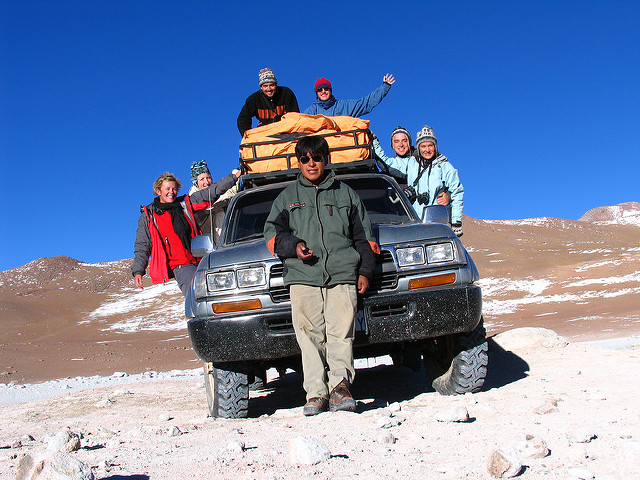

***Aller plus loin :***
[Voir un réseau de neurone fonctionner et jouer avec ses paramètres ici](https://playground.tensorflow.org)


 - [Load Data](#LoadData)
 - [Define Keras Model](#Define_Keras_Model)
 - [Compile Keras Model](#Compile_KM).
 - [Fit Keras Model](#Fit)
 - [Evaluate Keras Model](#Evaluate)
 - [Tie It All Together](#Tie_it_All_Together).
 - [Make Predictions](#Predict)

# <a id='LoadData'><font color='orangered'><center> Import des données</center><font>
Récupération du dataset produit sur le projet Diabète (C:\Users\Utilisateur\Documents\_Simplon\A_Rendre\Diabètes)
  -  [Define Keras Model](#Define_Keras_Model)
  -  [Compile Keras Model](#Compile_KM) 
  -  [Fit Keras Model](#Fit)
  -  [Evaluate Keras Model](#Evaluate)
  -  [Tie It All Together](#Tie_it_All_Together) 
  -  [Make Predictions](#Predict)

In [9]:
import pandas as pd

In [10]:
df_clean = pd.read_csv("Datasets/df_correct.csv")

In [45]:
df_clean

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72,35,115,33.6,0.627,50,1
1,1,1,85.0,66,29,382,26.6,0.351,31,0
2,2,8,183.0,64,16,720,23.3,0.672,32,1
3,3,1,89.0,66,23,94,28.1,0.167,21,0
4,4,0,137.0,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
728,763,10,101.0,76,48,180,32.9,0.171,63,0
729,764,2,122.0,70,27,708,36.8,0.340,27,0
730,765,5,121.0,72,23,112,26.2,0.245,30,0
731,766,1,126.0,60,77,26,30.1,0.349,47,1


In [54]:
# Je croyais que ça provoquait une erreur
data = df_clean.iloc[:,1:-1]
target = df_clean.Outcome 

In [29]:
from numpy import loadtxt

In [79]:
dataset = loadtxt('Datasets/pima-indians-diabetes.csv', delimiter=',')

In [82]:
data2 = dataset[:,0:-1]
target2 = dataset[:,-1]

# <a id='Define_Keras_Model'><font color='orangered'><center> Définition d'un modèle Keras</center><font>
    
***Prérequis :***
  - <i>Python 2 ou 3.</i>
  - <i>SciPy (y compris NumPy).</i>
  - <i>Keras et un backend (Theano ou TensorFlow) sont [installés et configurés](#https://machinelearningmastery.com/setup-python-environment-machine-learning-deep-learning-anaconda/). 
     - (```pip install --upgrade --user TensorFlow```)  </i>
      - <i>(```pip install keras```)  </i><br>
    
 Les modèles keras sont défini en [séquences de couche](#https://keras.io/api/models/sequential/).<br>
    Celà signifie qu'on déclare chaque couche du réseau séparément. <br>
    Par exemple :

 ```python
    import tensorflow as tf

    inputs = tf.keras.Input(shape=(3,)) # déclaration de la couche d'input
    x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs) 
    outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
```

    - La [doc](#https://www.tensorflow.org/api_docs/python/tf/keras/Model) de la déclaration d'un modèle
    - la [doc](#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) de la déclaration d'un couche
    
**Arguments** | **Intitulé**|**Paramètres**
--|--|--
units | Entier positif, dimension de l'espace de sortie. | Entier
activation | Fonction d'activation (lineaire par défaut). | `relu` `sigmoid` `softmax` `softplus` `softsign` `tanh` `selu` `elu` `exponential` 
`use_bias` |  Booléen, pour choisir d'utiliser un biais. | Booléen
kernel_initializer | [Initialiseur](https://keras.io/api/layers/initializers/) pour le noyau de la matrice des poids.
bias_initializer |  Initialiseur pour le vecteur de biais.
kernel_regularizer | [Regulariseur](https://keras.io/api/layers/regularizers/) fonction de régularisation du noyaux de la matrice des poids | `L1` `L2` `l1_l2`
bias_regularizer |  Fonction de régularisation du vecteur de biai.
activity_regularizer |  Fonction de régularisation appliquée à la sortie de la couche (son "activation").
kernel_constraint | [Constraint](https://keras.io/api/layers/constraints/) function applied to the kernel weights matrix.) | `MaxNorm` `MinMaxNorm` `NonNeg` `UnitNorm` `RadialConstraint` 
bias_constraint | Constraint function applied to the bias vector.
    Navigate:
    
  - [Load Data](#LoadData)
  -  [Compile Keras Model](#Compile_KM) 
  -  [Fit Keras Model](#Fit)
  -  [Evaluate Keras Model](#Evaluate)
  -  [Tie It All Together](#Tie_it_All_Together) 
  -  [Make Predictions](#Predict)
    </ul>

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [33]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) #8 pour le nombre de features, c'est la couche input
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# <a id='Compile_KM'><font color='orangered'><center> Compiler le modèle</center></font></a>
 - [Load Data](#LoadData)
 - [Define Keras Model](#Define_Keras_Model)
 - [Fit Keras Model](#Fit)
 - [Evaluate Keras Model](#Evaluate)
 - [Tie It All Together](#Tie_it_All_Together).
 - [Make Predictions](#Predict)

In [86]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# <a id='Fit'><font color='orangered'><center> Entraînement du modèle</center></font></a>
 - [Load Data](#LoadData)
 - [Define Keras Model](#Define_Keras_Model)
 - [Compile Keras Model](#Compile_KM)
 - [Evaluate Keras Model](#Evaluate)
 - [Tie It All Together](#Tie_it_All_Together).
 - [Make Predictions](#Predict)

### J'ai une erreur
```python
# fit the keras model on the dataset
model.fit(data, target, epochs=150, batch_size=10)

TypeError: 'NoneType' object is not callable
```
L'erreur était due au fait que `model` n'avait pas été compilé. Je n'avais pas lancé la ligne précédente \o/

In [90]:
# fit the keras model on the dataset
model.fit(x=data, y=target, epochs=150, batch_size=10, verbose=True)

Epoch 1/150
74/74 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7613
Epoch 2/150
74/74 [==============================] - 0s 6ms/step - loss: 0.4779 - accuracy: 0.7708: 0s - loss: 0.4513 - accura
Epoch 3/150
74/74 [==============================] - 0s 3ms/step - loss: 0.4988 - accuracy: 0.7381
Epoch 4/150
74/74 [==============================] - 0s 5ms/step - loss: 0.4676 - accuracy: 0.7804
Epoch 5/150
74/74 [==============================] - 0s 3ms/step - loss: 0.4713 - accuracy: 0.7708
Epoch 6/150
74/74 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.7517
Epoch 7/150
74/74 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.7694
Epoch 8/150
74/74 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.7531
Epoch 9/150
74/74 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7708
Epoch 10/150
74/74 [==============================] - 0s 2ms/step - loss: 0.4814 

74/74 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7653
Epoch 83/150
74/74 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7667
Epoch 84/150
74/74 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.7844
Epoch 85/150
74/74 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7626
Epoch 86/150
74/74 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7708
Epoch 87/150
74/74 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 0.7749
Epoch 88/150
74/74 [==============================] - 0s 1ms/step - loss: 0.4673 - accuracy: 0.7681
Epoch 89/150
74/74 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.7831
Epoch 90/150
74/74 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.7694
Epoch 91/150
74/74 [==============================] - 0s 2ms/step - loss: 0.4636 - accuracy: 0.7763
Epoch 92/150


# <a id='Evaluate'><font color='orangered'><center>Evaluation du modèle</center></font></a>
Avec la fonction `keras.models.Sequential.evaluate` qui retourne la perte et l'accuracy(exactitude?)
Plus d'information [ici](https://machinelearningmastery.com/evaluate-skill-deep-learning-models/)
 - [Load Data](#LoadData)
 - [Define Keras Model](#Define_Keras_Model)
 - [Compile Keras Model](#Compile_KM).
 - [Fit Keras Model](#Fit)
 - [Tie It All Together](#Tie_it_All_Together).
 - [Make Predictions](#Predict)

In [139]:
# evaluate the keras model
loss, accuracy = model.evaluate(data, target)

23/23 [==============================] - 0s 1ms/step - loss: 0.4677 - accuracy: 0.7844


# <a id='Tie_it_All_Together'><font color='orangered'><center>Tout le code rassemblé</center></font></a>

 - [Load Data](#LoadData)
 - [Define Keras Model](#Define_Keras_Model)
 - [Compile Keras Model](#Compile_KM).
 - [Fit Keras Model](#Fit)
 - [Evaluate Keras Model](#Evaluate)
 - [Make Predictions](#Predict)

```python
# Import d'un dataset
import pandas as pd

df_clean = pd.read_csv("Datasets/df_correct.csv")

# Définition d'un modèle Keras=>
## nb de noeuds, 
## dimension d'input *pour la couche d'entrée*, 
## fonction d'activation de la couche
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) #8 pour le nombre de features, c'est la couche input
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle sur le jeu de données
model.fit(x=data, y=target, epochs=150, batch_size=10, verbose=True)

# Evaluation du modèle
loss, accuracy = model.evaluate(data, target)
```

# <a id='Predict'><font color='orangered'><center>Faire des prédictions avec ce modèle</center></font></a>

 - [Load Data](#LoadData)
 - [Define Keras Model](#Define_Keras_Model)
 - [Compile Keras Model](#Compile_KM).
 - [Fit Keras Model](#Fit)
 - [Evaluate Keras Model](#Evaluate)
 - [Tie It All Together](#Tie_it_All_Together)